In [55]:
from datasets.generic_dataset import GenericSegmentationDataset
from utils.transforms import *
from pathlib import Path
import matplotlib.pyplot as plt
from mxnet.gluon.data.vision.transforms import * 

In [65]:
# TODO
mean = (0.415, 0.373, 0.351)
std = (0.283, 0.268, 0.268)

In [74]:
transforms = BiTransforms([
    BiTransform(img=Resize((100, 100)), seg=Resize((100, 100))),
    SyncRandomHorizontalFlip(),
    SyncRandomRotation(degrees=(-10, 10)),
    SyncRandomScaledCrop(scale=(0.5, 2.0)),
    BiTransform(img=ToTensor(), seg=ToTensor()),
    BiTransform(img=ToPILImage(), seg=ToPILImage()),
])

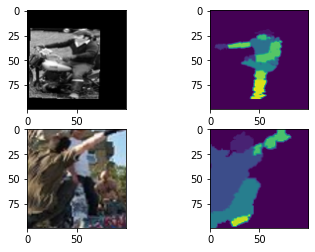

In [75]:
root = Path('test/datasets/lip/')
datasets = GenericSegmentationDataset(root, mode='train', transform=transforms)

fig = plt.figure()
rows = len(datasets)
cols = 2

i = 1
for img, seg in datasets:
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)
    i += 1
    fig.add_subplot(rows, cols, i)
    plt.imshow(seg)
    i += 1

plt.show()